# Naive Bayes (Gaussian)

### **Step 0: Import packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

### **Step 1: Load data**

In [2]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
# User ID is useless and we ignore gender for this problem
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

In [4]:
# print(x)
# print(y)

### **Step 2: Split data**

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [6]:
# print(x_train)
# print(x_test)
# print(y_train)
# print(y_test)

### **Step 3: Feature scaling**

In [7]:
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.transform(x_test)

In [8]:
# print(x_train)
# print(y_train)

### **Step 4: Fit model**

In [9]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

### **Step 5: Prediction & Visualization**

In [10]:
y_pred = nb.predict(x_test)

In [11]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[65  3]
 [ 7 25]]


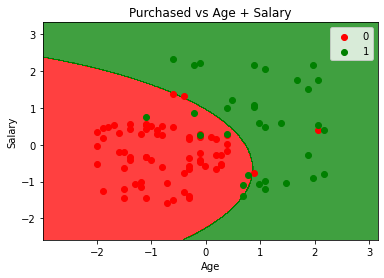

In [12]:
x1,x2 = np.meshgrid(np.arange(x_test[:,0].min()-1, x_test[:,0].max()+1, 0.01),
                    np.arange(x_test[:,1].min()-1, x_test[:,1].max()+1, 0.01))
y_pred_hq = nb.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
# plot the predicted decision boundary
plt.contourf(x1,x2,y_pred_hq,alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
# plot data points with diff colors for diff classes
for i,j in enumerate(np.unique(y_test)): # enumerate adds indices to the list/array to make iteration more convenient
    plt.scatter(x_test[y_test==j,0],x_test[y_test==j,1],
                color=ListedColormap(('red','green'))(i), label=j)
plt.title('Purchased vs Age + Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

Gaussian NB classifier is also able to roughly capture this shape of decision boundary, just like KNN and SVM with rbf.

As a matter of fact, Gaussian NB might be the much better classifier for this dataset since KNN and SVM with rbf seemed to be overfitting.